Graphical results notebook for matrix multiplication benchmarking in Python using mlx, numpy, and pure python implementations.

In [3]:
from multiply.benchmark import benchmark_range, benchmark
from multiply.payloads import multiply_at_size
import numpy as np

In [4]:
def data_for_engine(engine, limit):
    def multiply_engine(size):
        return multiply_at_size(size, engine)
    return benchmark_range(multiply_engine, 2**np.arange(1, limit, 0.5))

In [5]:
limits = {
    'python': 9,
    'numpy': 13,
    'numba': 10,
    'mlx': 15
}
data = {engine: data_for_engine(engine, limit) for engine, limit in limits.items()}


/Users/jamespjh/devel/stubs/languages/python/multiply/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2625: RuntimeWarning: divide by zero encountered in <lambda> (vectorized)
  outputs = ufunc(*args, out=...)


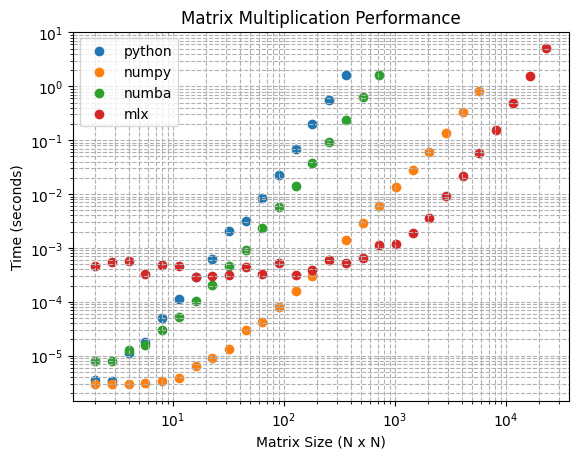

In [10]:
import matplotlib.pyplot as plt
for engine, engine_data in data.items():
    plt.scatter(*engine_data, label=engine)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Performance')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [24]:

#Model the data as a power law plus a constant
def model_function(x, a, b, c):
    return np.log(c + a * x ** b)

from scipy.optimize import curve_fit


In [27]:
seeds = {
    'python': [4e-9, 3, 1e-4],
    'numpy': [4e-9, 3, 1e-4],
    'numba': [4e-9, 3, 1e-4],
    'mlx': [4e-9, 3, 1e-4]
}

params_for_engine = {
    engine: curve_fit(
        model_function,
        engine_data[0],
        np.log(engine_data[1]),
        p0=seeds[engine],
        bounds=([0, 0, 0], [np.inf, np.inf, np.inf])
    )[0]
    for engine, engine_data in data.items()
}
params_for_engine

{'python': array([1.45872517e-07, 2.70561444e+00, 2.28532214e-06]),
 'numpy': array([4.27159529e-09, 2.17341614e+00, 3.20952877e-06]),
 'numba': array([7.44537236e-08, 2.53353389e+00, 8.57179493e-06]),
 'mlx': array([1.92990823e-09, 1.99398238e+00, 3.75165334e-04])}

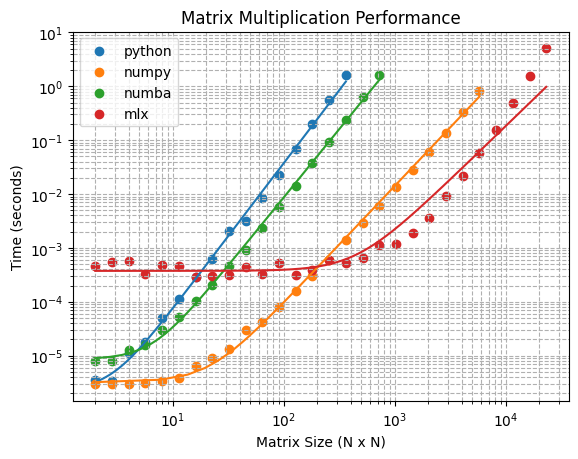

In [28]:
# Plot with a fit

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Matrix Size (N)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Time vs Size')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Performance')
plt.grid(True, which="both", ls="--")

def plot_with_fit(data, model, fit, label):
    x_fit = np.linspace(data[0].min(), data[0].max(), 1000)
    y_fit = np.exp(model(x_fit, *fit))
    plt.scatter(*data, marker='o', label=label)
    plt.plot(x_fit, y_fit)

for engine, engine_data in data.items():
    fit_params = params_for_engine[engine]
    plot_with_fit(engine_data, model_function, fit_params, engine)

plt.legend()
plt.show()